### Import Required Libraries


In [42]:
### Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte, feature
import os



### Define Functions
#### `get_chain_code`


In [43]:
# Function to get the chain code of a contour
def get_chain_code(contour):
    chain_code = []
    directions = {
        (1, 0): 0, (1, 1): 1, (0, 1): 2, (-1, 1): 3,
        (-1, 0): 4, (-1, -1): 5, (0, -1): 6, (1, -1): 7
    }
    for i in range(1, len(contour)):
        dx = contour[i][0] - contour[i-1][0]
        dy = contour[i][1] - contour[i-1][1]
        direction = min(directions.keys(), key=lambda k: (k[0] - dx)**2 + (k[1] - dy)**2)
        chain_code.append(directions[direction])
    return chain_code



#### `first_difference`


In [44]:
# Function to calculate the first difference of the chain code
def first_difference(chain_code):
    return [(chain_code[i] - chain_code[i-1]) % 8 for i in range(1, len(chain_code))]



#### `shape_number`


In [45]:
# Function to calculate the shape number from the first difference
def shape_number(first_diff):
    min_shape_number = first_diff
    for i in range(len(first_diff)):
        rotated = first_diff[i:] + first_diff[:i]
        if rotated < min_shape_number:
            min_shape_number = rotated
    return min_shape_number



### Directory and File Checks


In [46]:
# Define a higher-level directory to print its contents
higher_level_path = r'C:\\Users\\danis\\OneDrive\\Documents\\Repos\\CV_PE2\\Practicals'

# Print the contents of the higher-level directory
print("Contents of the higher-level directory:")
print(os.listdir(higher_level_path))

# Define the original paths
base_path = r'C:\\Users\\danis\\OneDrive\\Documents\\Repos\\CV_PE2\\Practicals\\P4_ChainCodes\\data'
image_path = os.path.join(base_path, '5.png')

# Check if the base directory exists
if not os.path.exists(base_path):
    raise ValueError(f"Directory does not exist at path: {base_path}")

# Check if the image file exists
if not os.path.exists(image_path):
    raise ValueError(f"File does not exist at path: {image_path}")

Contents of the higher-level directory:
['P1_GeometricTransforms', 'P2_GLCM', 'P3_', 'P4_ChainCodes']




### Load and Process Image


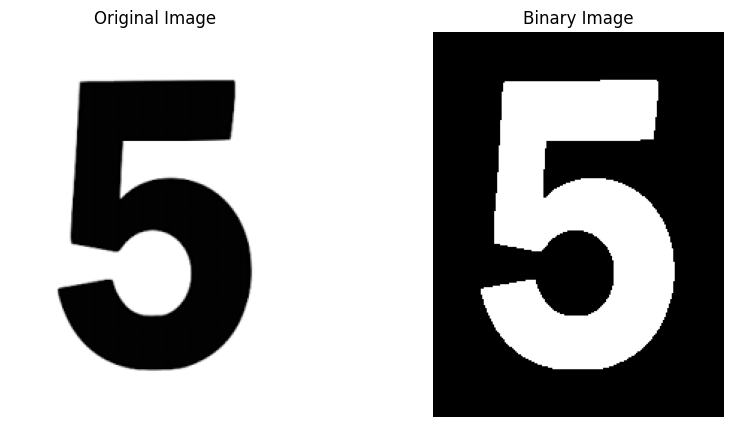

In [47]:
# Load the image of digit '5'
image = cv2.imread(image_path, 0)

# Check if the image is loaded properly
if image is None:
    raise ValueError(f"Image not found or unable to load at path: {image_path}")

# Threshold the image
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)  # Use THRESH_BINARY_INV for white digits on black background

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any contours are found
if not contours:
    raise ValueError("No contours found in the image.")

# Visualize the original and binary images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.show()



### Process Contour


Chain Code: [3, 3, 1, 7, 1, 3, 5, 5, 3, 1]
First Difference: [0, 6, 6, 2, 2, 2, 0, 6, 6]
Shape Number: [0, 6, 6, 0, 6, 6, 2, 2, 2]


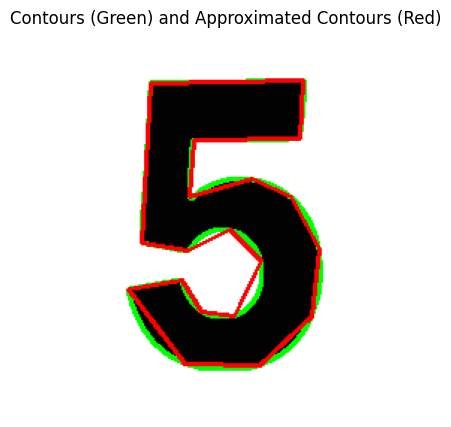

In [48]:
# Assume we are interested in the largest contour
contour = max(contours, key=cv2.contourArea)

# Approximate the contour to reduce the number of points
epsilon = 0.01 * cv2.arcLength(contour, True)
approx_contour = cv2.approxPolyDP(contour, epsilon, True)

# Get chain code
chain_code = get_chain_code(approx_contour.reshape(-1, 2))

# Downsample the chain code (if required, here we assume it's already less than order 10)
if len(chain_code) > 10:
    chain_code = chain_code[:10]

# Calculate first difference and shape number
first_diff = first_difference(chain_code)
shape_num = shape_number(first_diff)

print("Chain Code:", chain_code)
print("First Difference:", first_diff)
print("Shape Number:", shape_num)

# Visualize the contour and approximated contour
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
cv2.drawContours(image_with_contours, [approx_contour], -1, (255, 0, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(image_with_contours)
plt.title('Contours (Green) and Approximated Contours (Red)')
plt.axis('off')
plt.show()